In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

#import relevant libraries

%matplotlib inline
import matplotlib.pyplot as plt
from glob import glob
import seaborn as sns
from PIL import Image
#from imutils import paths
import random
import pickle
import cv2
import datetime
from pprint import pprint
import librosa


from sklearn.model_selection import *
from sklearn.preprocessing import *
from sklearn.metrics import *

import keras
from keras.regularizers import *
from keras.initializers import glorot_uniform

import keras.backend as K
K.clear_session()

from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import *

/kaggle/input/nbaiot-dataset/7.gafgyt.combo.csv
/kaggle/input/nbaiot-dataset/9.gafgyt.combo.csv
/kaggle/input/nbaiot-dataset/5.gafgyt.combo.csv
/kaggle/input/nbaiot-dataset/1.mirai.udp.csv
/kaggle/input/nbaiot-dataset/4.gafgyt.udp.csv
/kaggle/input/nbaiot-dataset/6.gafgyt.udp.csv
/kaggle/input/nbaiot-dataset/6.gafgyt.junk.csv
/kaggle/input/nbaiot-dataset/data_summary.csv
/kaggle/input/nbaiot-dataset/5.gafgyt.udp.csv
/kaggle/input/nbaiot-dataset/9.gafgyt.junk.csv
/kaggle/input/nbaiot-dataset/9.mirai.scan.csv
/kaggle/input/nbaiot-dataset/1.benign.csv
/kaggle/input/nbaiot-dataset/2.mirai.udpplain.csv
/kaggle/input/nbaiot-dataset/3.gafgyt.combo.csv
/kaggle/input/nbaiot-dataset/4.gafgyt.combo.csv
/kaggle/input/nbaiot-dataset/6.mirai.scan.csv
/kaggle/input/nbaiot-dataset/5.mirai.udp.csv
/kaggle/input/nbaiot-dataset/3.benign.csv
/kaggle/input/nbaiot-dataset/3.gafgyt.junk.csv
/kaggle/input/nbaiot-dataset/7.gafgyt.scan.csv
/kaggle/input/nbaiot-dataset/features.csv
/kaggle/input/nbaiot-dataset/6

In [3]:
benign=pd.read_csv('/kaggle/input/nbaiot-dataset/1.benign.csv')
gc= pd.read_csv('/kaggle/input/nbaiot-dataset/1.gafgyt.combo.csv')
gj=pd.read_csv('/kaggle/input/nbaiot-dataset/1.gafgyt.junk.csv')
gs=pd.read_csv('/kaggle/input/nbaiot-dataset/1.gafgyt.scan.csv')
# gt=pd.read_csv('/kaggle/input/nbaiot-dataset/1.gafgyt.tcp.csv')
gu=pd.read_csv('/kaggle/input/nbaiot-dataset/1.gafgyt.udp.csv')
ma =pd.read_csv('/kaggle/input/nbaiot-dataset/1.mirai.ack.csv')
msc=pd.read_csv('/kaggle/input/nbaiot-dataset/1.mirai.scan.csv')
msy=pd.read_csv('/kaggle/input/nbaiot-dataset/1.mirai.syn.csv')
mu =pd.read_csv('/kaggle/input/nbaiot-dataset/1.mirai.udp.csv')
mup=pd.read_csv('/kaggle/input/nbaiot-dataset/1.mirai.udpplain.csv')

In [4]:
benign['type']='benign'
gc['type']='gafgyt.combo'
gj['type']='gafgyt.junk'
gs['type']='gafgyt.scan'
# gt['type']='gafgyt.tcp'
gu['type']='gafgyt.udp'
ma['type']='mirai.ack'
msc['type']='mirai.scan'
msy['type']='mirai.syn'
mu['type']='mirai.udp'
mup['type']='mirai.udpplain'


In [5]:
df=pd.concat([benign,gc,gj,gs,gu,ma,msc,msy,mu,mup],
sort=False,axis=0,ignore_index=True)

In [6]:
df.groupby('type')['type'].count()

type
benign             49548
gafgyt.combo       59718
gafgyt.junk        29068
gafgyt.scan        29849
gafgyt.udp        105874
mirai.ack         102195
mirai.scan        107685
mirai.syn         122573
mirai.udp         237665
mirai.udpplain     81982
Name: type, dtype: int64

In [7]:
sampler=np.random.permutation(len(df))
df=df.take(sampler)
df

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,type
108683,162.038701,74.042451,1.816092e+01,270.998172,74.209645,1.499303e+02,814.545628,75.228258,990.249604,7843.275585,...,0.0,0.0,2.142081,74.0,9.536743e-07,95.268043,1.286220e-12,0.0,0.0,gafgyt.combo
120026,148.857470,74.135820,1.289199e+01,255.585884,74.217557,3.804200e+01,810.043783,74.309476,68.110035,6178.271341,...,0.0,0.0,1.000000,74.0,0.000000e+00,74.000000,0.000000e+00,0.0,0.0,gafgyt.junk
779302,165.493062,306.268355,6.100846e+04,259.742584,321.063971,6.081120e+04,755.416254,351.323913,59044.378501,6546.303818,...,0.0,0.0,1.000000,554.0,0.000000e+00,554.000000,0.000000e+00,0.0,0.0,mirai.udp
137618,157.848682,73.977020,7.327474e-01,266.441461,73.994545,4.050166e+00,819.828056,74.369189,290.465557,7420.065716,...,0.0,0.0,1.695020,74.0,0.000000e+00,95.268043,0.000000e+00,0.0,0.0,gafgyt.junk
113849,189.623331,74.007325,1.789708e-01,312.052333,74.016030,6.662359e-01,905.887040,74.060293,15.479925,3820.874827,...,0.0,0.0,1.000000,74.0,0.000000e+00,74.000000,0.000000e+00,0.0,0.0,gafgyt.junk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3040,1.146861,78.000000,9.090000e-13,1.316332,78.000000,2.180000e-11,1.681477,78.001558,0.037580,4.239962,...,0.0,0.0,1.000000,78.0,0.000000e+00,78.000000,0.000000e+00,0.0,0.0,benign
523032,116.918362,70.923915,3.360289e+01,195.263570,70.929293,3.356066e+01,620.369066,70.056945,39.663721,6562.899676,...,0.0,0.0,1.000000,60.0,0.000000e+00,60.000000,0.000000e+00,0.0,0.0,mirai.syn
558412,115.788347,71.465033,2.906348e+01,205.565668,70.452439,3.708134e+01,653.071174,69.649884,42.091811,6685.471317,...,0.0,0.0,1.000000,74.0,0.000000e+00,74.000000,0.000000e+00,0.0,0.0,mirai.syn
90689,299.566049,74.003233,1.276148e-01,403.930203,74.007637,3.413014e-01,861.825018,74.014408,0.918650,7686.593670,...,0.0,0.0,1.700025,74.0,0.000000e+00,95.268043,0.000000e+00,0.0,0.0,gafgyt.combo


In [8]:
labels_full=pd.get_dummies(df['type'], prefix='type')
labels_full.head()

,type_benign,type_gafgyt.combo,type_gafgyt.junk,type_gafgyt.scan,type_gafgyt.udp,type_mirai.ack,type_mirai.scan,type_mirai.syn,type_mirai.udp,type_mirai.udpplain
108683,False,True,False,False,False,False,False,False,False,False
120026,False,False,True,False,False,False,False,False,False,False
779302,False,False,False,False,False,False,False,False,True,False
137618,False,False,True,False,False,False,False,False,False,False
113849,False,False,True,False,False,False,False,False,False,False


In [9]:
df=df.drop(columns='type')
df.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
108683,162.038701,74.042451,18.160922,270.998172,74.209645,149.930259,814.545628,75.228258,990.249604,7843.275585,...,4.547474e-13,0.0,0.0,2.142081,74.0,9.536743e-07,95.268043,1.286220e-12,0.0,0.0
120026,148.857470,74.135820,12.891988,255.585884,74.217557,38.042005,810.043783,74.309476,68.110035,6178.271341,...,0.000000e+00,0.0,0.0,1.000000,74.0,0.000000e+00,74.000000,0.000000e+00,0.0,0.0
779302,165.493062,306.268355,61008.464696,259.742584,321.063971,60811.204713,755.416254,351.323913,59044.378501,6546.303818,...,0.000000e+00,0.0,0.0,1.000000,554.0,0.000000e+00,554.000000,0.000000e+00,0.0,0.0
137618,157.848682,73.977020,0.732747,266.441461,73.994545,4.050166,819.828056,74.369189,290.465557,7420.065716,...,1.818989e-12,0.0,0.0,1.695020,74.0,0.000000e+00,95.268043,0.000000e+00,0.0,0.0
113849,189.623331,74.007325,0.178971,312.052333,74.016030,0.666236,905.887040,74.060293,15.479925,3820.874827,...,0.000000e+00,0.0,0.0,1.000000,74.0,0.000000e+00,74.000000,0.000000e+00,0.0,0.0


In [10]:
def standardize(df,col):
    df[col]= (df[col]-df[col].mean())/df[col].std()

data_st=df.copy()
for i in (data_st.iloc[:,:-1].columns):
    standardize (data_st,i)

data_st.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
108683,0.977021,-0.797530,-0.846044,1.128513,-0.838608,-0.886930,1.243258,-0.864944,-0.881151,1.271494,...,-0.011483,-0.010213,-0.011563,-0.216062,-0.605707,-0.015623,-0.525763,-0.011617,-0.010535,0.0
120026,0.754636,-0.796965,-0.846250,0.964192,-0.838558,-0.891058,1.226736,-0.870924,-0.913872,0.632871,...,-0.011483,-0.010213,-0.011563,-0.216366,-0.605707,-0.015623,-0.621709,-0.011617,-0.010535,0.0
779302,1.035301,0.606998,1.538318,1.008509,0.723309,1.351277,1.026251,0.932041,1.178847,0.774032,...,-0.011483,-0.010213,-0.011563,-0.216366,1.550013,-0.015623,1.543711,-0.011617,-0.010535,0.0
137618,0.906330,-0.797926,-0.846725,1.079931,-0.839969,-0.892312,1.262644,-0.870535,-0.905982,1.109169,...,-0.011483,-0.010213,-0.011563,-0.216181,-0.605707,-0.015623,-0.525763,-0.011617,-0.010535,0.0
113849,1.442411,-0.797742,-0.846747,1.566218,-0.839833,-0.892437,1.578484,-0.872546,-0.915740,-0.271323,...,-0.011483,-0.010213,-0.011563,-0.216366,-0.605707,-0.015623,-0.621709,-0.011617,-0.010535,0.0


In [11]:
train_data_st=data_st.values
train_data_st

array([[ 0.97702133, -0.79753005, -0.84604389, ..., -0.01161699,
        -0.01053538,  0.        ],
       [ 0.75463637, -0.79696535, -0.84624987, ..., -0.01161699,
        -0.01053538,  0.        ],
       [ 1.03530101,  0.60699845,  1.53831819, ..., -0.01161699,
        -0.01053538,  0.        ],
       ...,
       [ 0.1967161 , -0.81311857, -0.84561766, ..., -0.01161699,
        -0.01053538,  0.        ],
       [ 3.29729131, -0.79776725, -0.84674888, ..., -0.01161699,
        -0.01053538,  0.        ],
       [-0.07517811, -0.80363269, -0.84626155, ..., -0.01161699,
        -0.01053538,  0.        ]])

In [12]:
labels=labels_full.values
labels

array([[False,  True, False, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       [False, False, False, ..., False,  True, False],
       ...,
       [False, False, False, ...,  True, False, False],
       [False,  True, False, ..., False, False, False],
       [False, False, False, ...,  True, False, False]])

In [13]:
x_train, x_test, y_train, y_test = train_test_split(train_data_st, labels, test_size=0.2,random_state=42)
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size=0.125,random_state=42)

print(x_train.shape)
print(x_test.shape)
print(x_validate.shape)

(648309, 115)
(185232, 115)
(92616, 115)


In [14]:
x_train_cnn = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_test_cnn = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
x_validate_cnn = np.reshape(x_validate, (x_validate.shape[0], x_validate.shape[1],1))
print(x_train_cnn.shape)
print(x_test_cnn.shape)
print(x_validate_cnn.shape)

(648309, 115, 1)
(185232, 115, 1)
(92616, 115, 1)


In [15]:
model = Sequential()
model.add(Dense(10, input_dim=train_data_st.shape[1], activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.add(Dense(labels.shape[1],activation='softmax'))

modelName = 'NBaIOT Model without FL'
keras.utils.plot_model(model, './'+modelName+'_Archi.png',show_shapes=True)
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 40)             │           440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           410 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            11 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │            20 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,041 (7.97 KB)

 Trainable params: 2,041 (7.97 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=5, strides=1, padding='same', input_shape = (train_data_st.shape[1], 1)))
model.add(Conv1D(filters=32, kernel_size=5, strides=1, padding='same'))
model.add(LSTM(32, activation = 'relu', return_sequences=True))
model.add(LSTM(16, return_sequences=True))  # returns a sequence of vectors of dimension 16
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

model.add(Dense(labels.shape[1],activation='softmax'))

modelName = 'CNN+LSTM'
keras.utils.plot_model(model, './'+modelName+'_Archi.png',show_shapes=True)
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 115, 64)        │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 115, 32)        │        10,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 115, 32)        │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 115, 16)        │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1840)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │       235,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,666 (1.02 MB)

 Trainable params: 266,666 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
inp = Input(shape=(train_data_st.shape[1], 1))
C = Conv1D(filters=32, kernel_size=5, strides=1)(inp)

C11 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(C)
A11 = Activation("relu")(C11)
C12 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(A11)
S11 = Add()([C12, C])
A12 = Activation("relu")(S11)
M11 = MaxPooling1D(pool_size=5, strides=2)(A12)


C21 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(M11)
A21 = Activation("relu")(C21)
C22 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(A21)
S21 = Add()([C22, M11])
A22 = Activation("relu")(S11)
M21 = MaxPooling1D(pool_size=5, strides=2)(A22)


C31 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(M21)
A31 = Activation("relu")(C31)
C32 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(A31)
S31 = Add()([C32, M21])
A32 = Activation("relu")(S31)
M31 = MaxPooling1D(pool_size=5, strides=2)(A32)


C41 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(M31)
A41 = Activation("relu")(C41)
C42 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(A41)
S41 = Add()([C42, M31])
A42 = Activation("relu")(S41)
M41 = MaxPooling1D(pool_size=5, strides=2)(A42)


C51 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(M41)
A51 = Activation("relu")(C51)
C52 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(A51)
S51 = Add()([C52, M41])
A52 = Activation("relu")(S51)
M51 = MaxPooling1D(pool_size=5, strides=2)(A52)

F1 = Flatten()(M51)

D1 = Dense(32)(F1)
A6 = Activation("relu")(D1)
D2 = Dense(32)(A6)
D3 = Dense(labels.shape[1])(D2)
A7 = Activation("softmax")(D3)

model = Model(inputs=inp, outputs=A7)


keras.utils.plot_model(model, './Deep_residual_CNN_model.png', show_shapes=True)

modelName='Deep residual CNN'

model.summary()

Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 115, 1)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 111, 32)   │        192 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_3 (Conv1D)   │ (None, 111, 32)   │      5,152 │ conv1d_2[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 111, 32)   │          0 │ conv1d_3[0][0]    │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_4 (Conv1D)   │ (None, 111, 32)   │      5,152 │ activation[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 111, 32)   │          0 │ conv1d_4[0][0],   │
│                     │                   │            │ conv1d_2[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 111, 32)   │          0 │ add[0][0]         │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_1     │ (None, 54, 32)    │          0 │ activation_3[0][… │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_7 (Conv1D)   │ (None, 54, 32)    │      5,152 │ max_pooling1d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 54, 32)    │          0 │ conv1d_7[0][0]    │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_8 (Conv1D)   │ (None, 54, 32)    │      5,152 │ activation_4[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 54, 32)    │          0 │ conv1d_8[0][0],   │
│                     │                   │            │ max_pooling1d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_5        │ (None, 54, 32)    │          0 │ add_2[0][0]       │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_2     │ (None, 25, 32)    │          0 │ activation_5[0][… │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_9 (Conv1D)   │ (None, 25, 32)    │      5,152 │ max_pooling1d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_6        │ (None, 25, 32)    │          0 │ conv1d_9[0][0]    │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_10 (Conv1D)  │ (None, 25, 32)    │      5,152 │ activation_6[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_3 (Add)         │ (None, 25, 32)    │          0 │ conv1d_10[0][0],  │
│                     │                   │            │ max_pooling1d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_7        │ (None, 25, 32)    │          0 │ add_3[0][0]       │
│ (Activation)        │                   │            │                 

 Total params: 46,922 (183.29 KB)

 Trainable params: 46,922 (183.29 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
adam = keras.optimizers.Adam() 
#sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True) 

model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])


In [19]:
epochs = 20
batch_size = 512
history = model.fit(x_train_cnn,y_train, batch_size=batch_size,
    steps_per_epoch=x_train.shape[0] // batch_size,
    epochs=epochs,
    validation_data=(x_validate_cnn,y_validate),
    #validation_split=0.10,
    
)


Epoch 1/20
  21/1266 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.2968 - loss: 2.1534  

I0000 00:00:1718537470.709926     109 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1718537470.736605     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1266/1266 ━━━━━━━━━━━━━━━━━━━━ 23s 10ms/step - accuracy: 0.8575 - loss: 0.3936 - val_accuracy: 0.9386 - val_loss: 0.1455
Epoch 2/20
   1/1266 ━━━━━━━━━━━━━━━━━━━━ 1:24:39 4s/step - accuracy: 0.9573 - loss: 1.1571

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1266/1266 ━━━━━━━━━━━━━━━━━━━━ 4s 324us/step - accuracy: 0.9573 - loss: 1.1571 - val_accuracy: 0.8969 - val_loss: 0.2787
Epoch 3/20
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9616 - loss: 0.0973 - val_accuracy: 0.9949 - val_loss: 0.0179
Epoch 4/20
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 0s 305us/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.9959 - val_loss: 0.0149
Epoch 5/20
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9941 - loss: 0.0185 - val_accuracy: 0.9976 - val_loss: 0.0100
Epoch 6/20
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step - accuracy: 0.9915 - loss: 0.0118 - val_accuracy: 0.9979 - val_loss: 0.0096
Epoch 7/20
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.9933 - loss: 0.0217 - val_accuracy: 0.9980 - val_loss: 0.0090
Epoch 8/20
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - accuracy: 1.0000 - loss: 0.0034 - val_accuracy: 0.9960 - val_loss: 0.0117
Epoch 9/20
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.9904 - loss: 0.0303 -

5789/5789 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step


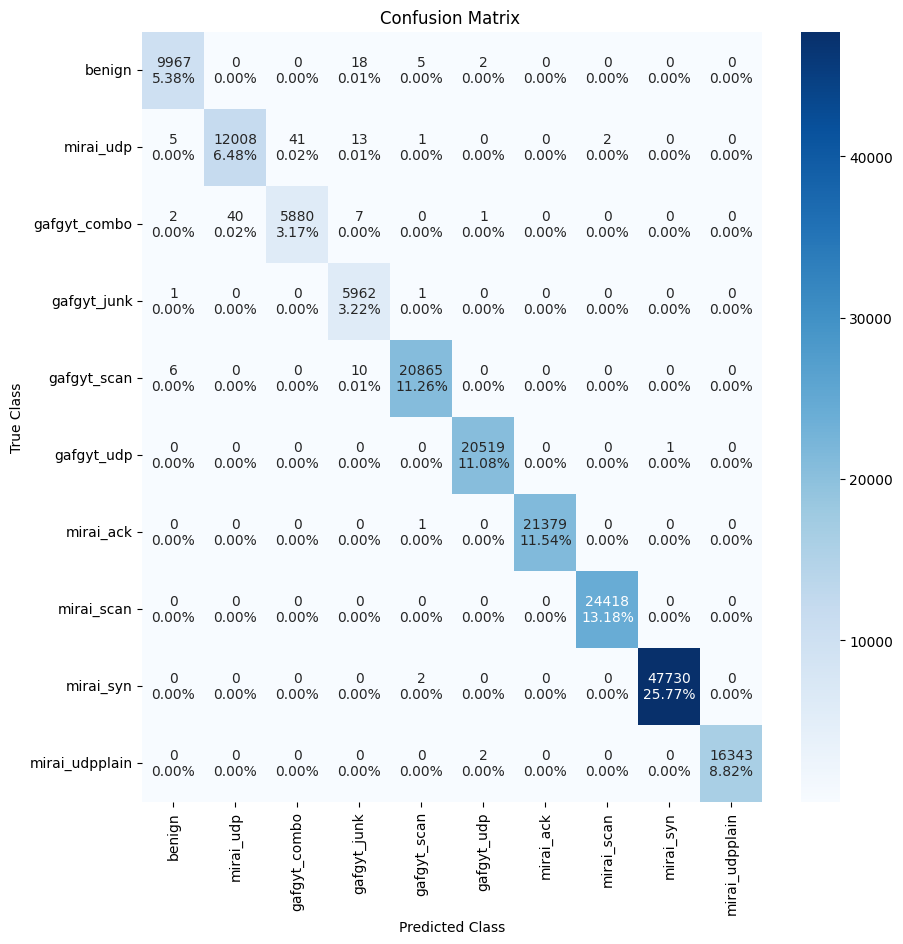

In [22]:

from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support,  roc_curve, auc
import tensorflow as tf 
#model = tf.keras.models.load_model('/'+model_name+'.h5')

y_pred = model.predict(x_test_cnn)

y_pred_cm  = np.argmax(y_pred, axis=1)
y_test_cm  = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test_cm, y_pred_cm) 

group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]

labels = np.asarray(labels).reshape(10,10)

label = ['benign','mirai_udp','gafgyt_combo','gafgyt_junk','gafgyt_scan','gafgyt_udp'\
        ,'mirai_ack','mirai_scan','mirai_syn','mirai_udpplain']

plt.figure(figsize=(10,10))
sns.heatmap(cm, xticklabels=label, yticklabels=label, annot=labels, fmt='', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix ')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.savefig('./''Confusion_matrix.png')
plt.show()

In [23]:
print(classification_report(y_test_cm, y_pred_cm, target_names= ['benign','mirai_udp','gafgyt_combo','gafgyt_junk','gafgyt_scan','gafgyt_udp','mirai_ack','mirai_scan','mirai_syn','mirai_udpplain']))

loss, accuracy = model.evaluate(x_test_cnn, y_test, verbose=1)
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))

with open('./'+modelName+'_CR.txt','a') as f:
    f.write(classification_report(y_test_cm, y_pred_cm, target_names= ['benign','mirai_udp','gafgyt_combo','gafgyt_junk','gafgyt_scan','gafgyt_udp','mirai_ack','mirai_scan','mirai_syn','mirai_udpplain']))
    f.write("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))

                precision    recall  f1-score   support

        benign       1.00      1.00      1.00      9992
     mirai_udp       1.00      0.99      1.00     12070
  gafgyt_combo       0.99      0.99      0.99      5930
   gafgyt_junk       0.99      1.00      1.00      5964
   gafgyt_scan       1.00      1.00      1.00     20881
    gafgyt_udp       1.00      1.00      1.00     20520
     mirai_ack       1.00      1.00      1.00     21380
    mirai_scan       1.00      1.00      1.00     24418
     mirai_syn       1.00      1.00      1.00     47732
mirai_udpplain       1.00      1.00      1.00     16345

      accuracy                           1.00    185232
     macro avg       1.00      1.00      1.00    185232
  weighted avg       1.00      1.00      1.00    185232

5789/5789 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9990 - loss: 0.0035
Test: accuracy = 0.999131  ;  loss = 0.003418


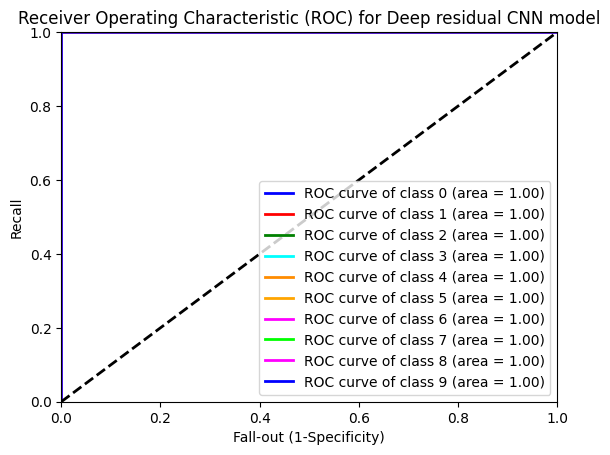

In [25]:
from itertools import cycle
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(labels.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green','aqua', 'darkorange', 'orange','fuchsia', 'lime','magenta'])
for i, color in zip(range(labels.shape[1]), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out (1-Specificity)')
plt.title('Receiver Operating Characteristic (ROC) for '+modelName+' model')
plt.legend(loc="lower right")
plt.savefig('./'+modelName+'_ROC.png')

plt.show()